# Assignment 4 - Arath Reyes

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
A = lambda dx: 0.16 - 0.03*dx
B = lambda dx,k: - 0.1*(dx**2) - 0.32
C = lambda dx: 0.16 + 0.03*dx

w_t = lambda w_plus, w, w_minus, dx, k: (k/2)*(w_plus*A(dx) + w*B(dx,k) + w_minus*C(dx)) + w
V_x_0 = lambda x: (np.exp(x) - 50)*(100 - np.exp(x))
P_s_0 = lambda s: (s-50)*(100-s)

In [4]:
dx = 1/100
k = 2
ds = k*(dx**2)

In [5]:
def solver(ds, dx):
    k = ds / (dx**2)
    M, N = int((1/ds)), int((1/dx))
    w = np.zeros((M + 1,N +1 ))
    x = np.linspace(np.log(50), np.log(100), N+1)
    s = np.linspace(50, 100, N+1)
    t = np.linspace(0,1, int(1/ds))
    w[0,] = V_x_0(x)
    for m in range(0,M):
        for n in range(1, N):
            w[m+1,n] = w_t(w[m, n+1], w[m,n], w[m, n-1], dx, k)
    return w,t,x

In [6]:
w, t, x = solver(ds, dx)

In [7]:
V_df = pd.DataFrame(index = x)
for s in [0, 0.25, 0.5, 0.75, 1]:
    V_df[f't = {s}'] = w[int(s/ds),]

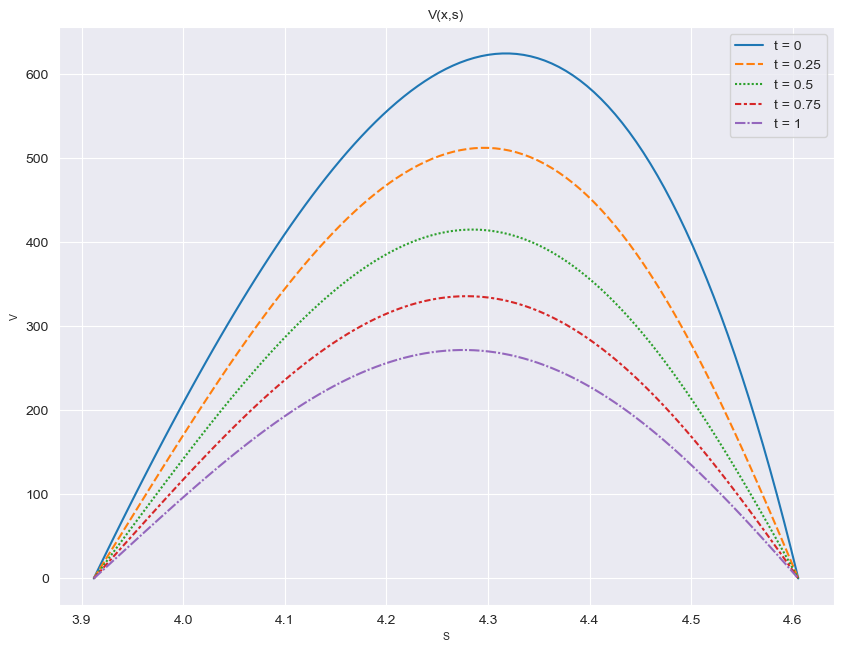

In [8]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,7.5))
ax = sns.lineplot(V_df)
ax.set_title(f'V(x,s)',fontsize = 10)
ax.set_xlabel('S',fontsize = '7.5')
ax.set_ylabel('V',fontsize = '7.5')
plt.show()

In [9]:
P_df = pd.DataFrame(index = np.exp(x))
for t in [0, 0.25, 0.5, 0.75, 1]:
    P_df[f't = {1-t}'] = w[int((t)/ds),]

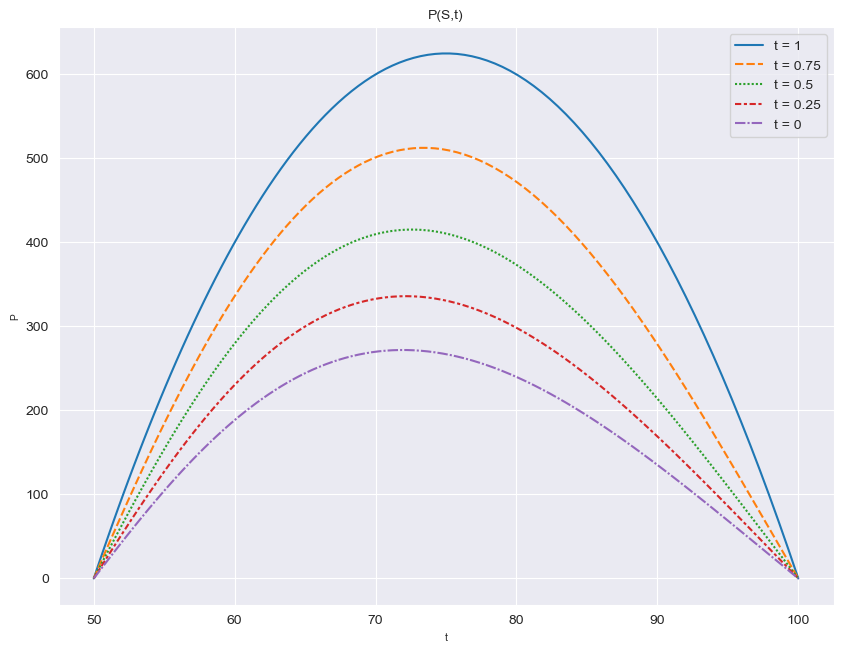

In [10]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,7.5))
ax = sns.lineplot(P_df)
ax.set_title(f'P(S,t)',fontsize = 10)
ax.set_xlabel('t',fontsize = '7.5')
ax.set_ylabel('P',fontsize = '7.5')
plt.show()

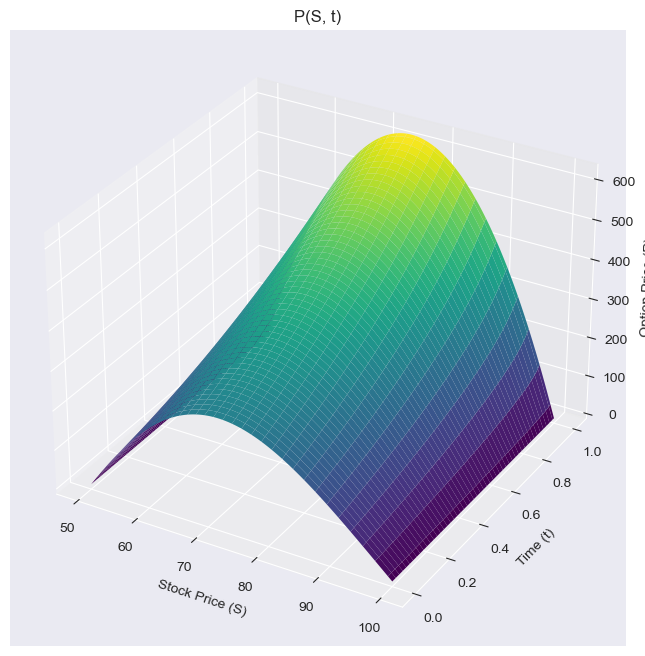

In [11]:
# Create a 3D plot for P(S, t) with correct mapping
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create meshgrid for stock price (S) and time (t)
S_grid, t_grid = np.meshgrid(np.exp(x), np.linspace(0, 1, int((1/ds)) + 1))

# Plot the surface
ax.plot_surface(S_grid, t_grid, w[::-1,], cmap='viridis', edgecolor='none')

# Labels and title
ax.set_xlabel('Stock Price (S)')
ax.set_ylabel('Time (t)')
ax.set_zlabel('Option Price (P)')
ax.set_title('P(S, t)')
plt.show()

In [12]:
S_max, P_max = round(np.exp(x)[np.argmax(w[int((1)/ds),])], 3), round(max(w[int((1)/ds),]),3)
print(f'The maximum value of P(S,0) is {P_max} at {S_max}')

The maximum value of P(S,0) is 271.938 at 71.698


The reason why $P(S,0)$ is maximized at a different value in comparisson with $P(S,1)$ could be explained as per discounting factor. Notice that $75*e^{-0.05} = 71.34$ which is close to the value shown above. The latter could imply that the value of the option is discounting the value of the stock at some degree.

## (d)

Now consider several iterations $k$ to show at which point it loss stability - Considering a fixed $\Delta x$

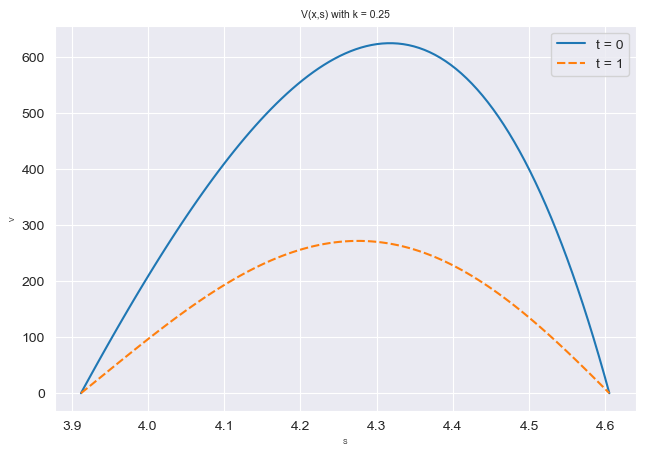

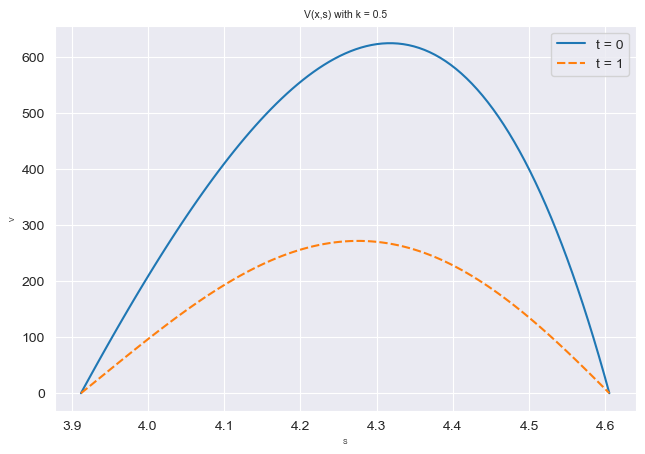

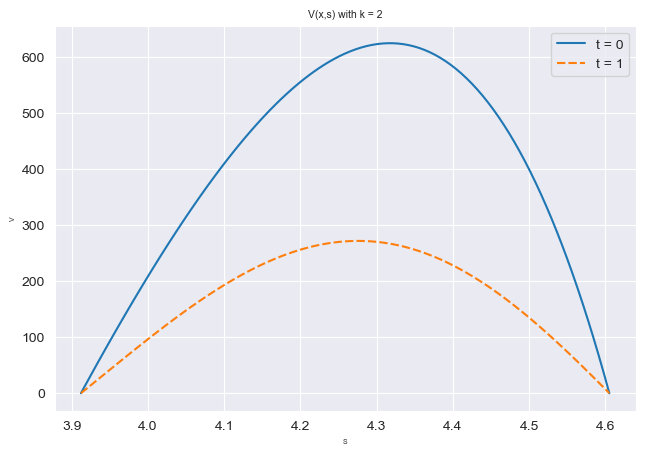

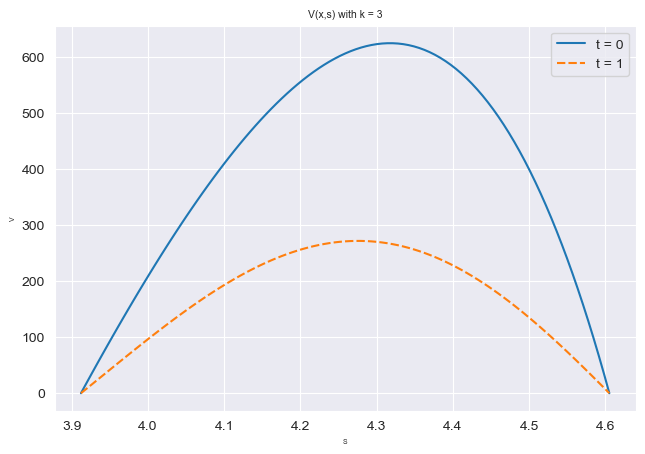

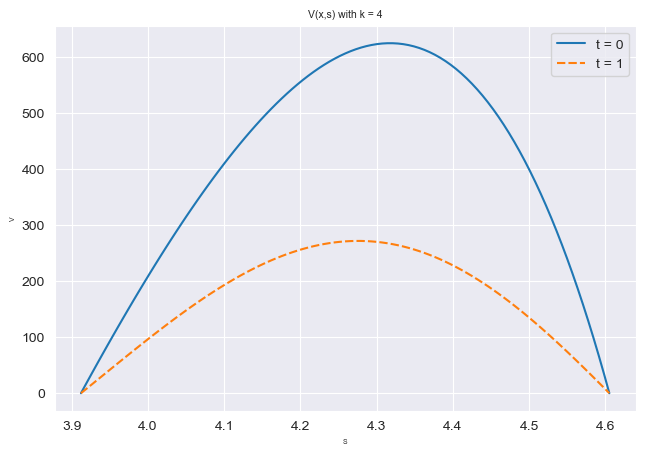

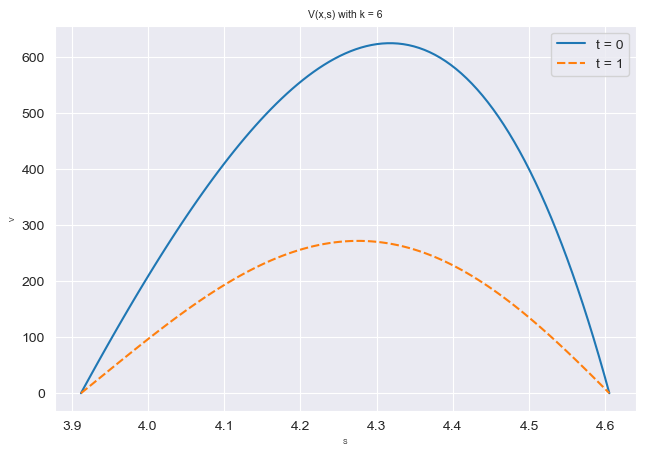

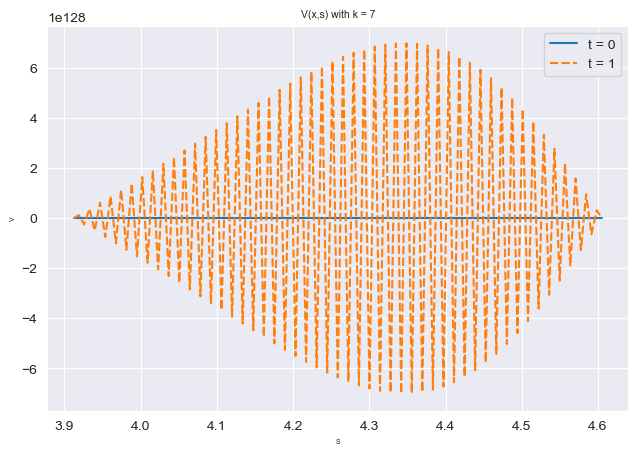

/var/folders/0t/9frdxs_x6xx6_qtzmnr8p5c40000gn/T/ipykernel_60316/3972285300.py:5: RuntimeWarning: overflow encountered in scalar multiply
  w_t = lambda w_plus, w, w_minus, dx, k: (k/2)*(w_plus*A(dx) + w*B(dx,k) + w_minus*C(dx)) + w
/var/folders/0t/9frdxs_x6xx6_qtzmnr8p5c40000gn/T/ipykernel_60316/3972285300.py:5: RuntimeWarning: invalid value encountered in scalar add
  w_t = lambda w_plus, w, w_minus, dx, k: (k/2)*(w_plus*A(dx) + w*B(dx,k) + w_minus*C(dx)) + w


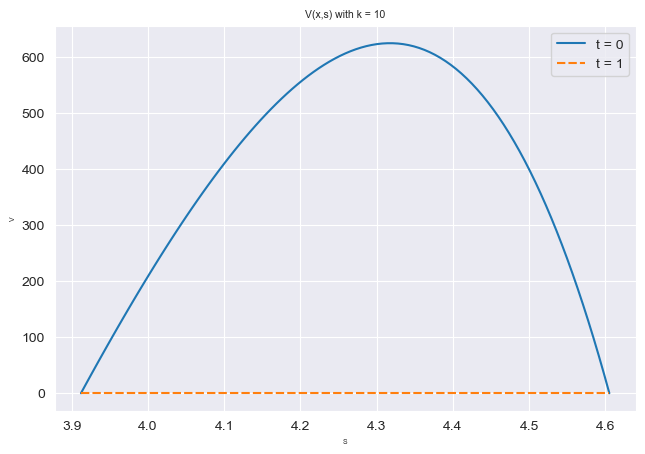

In [14]:
dx = 1/100
ks = [0.25, 0.5, 2, 3, 4, 6, 7, 10]
for k in ks:
    ds = k*(dx**2)
    w, t, x = solver(ds, dx)
    V_df = pd.DataFrame(index = x)
    for s in [0, 1]:
        V_df[f't = {s}'] = w[int(s/ds),]
    plt.figure(figsize=(7.5,5))
    ax = sns.lineplot(V_df)
    ax.set_title(f'V(x,s) with k = {k}',fontsize = 7.5)
    ax.set_xlabel('S',fontsize = '5')
    ax.set_ylabel('V',fontsize = '5')
    plt.show()

From the above we can conclude that the solver starts lossing stability for $k\in(6,7)$. Thus, the method becomes unstable for $k>6$.

Now, lets consider an analysis for several values of $\Delta x$ while fixing $k$. Given the computational cost of the method, as it is a $O(n^2)$ time complex algorithim, I'll vary $1/\Delta x$ for values below $250$

### k = 0,5

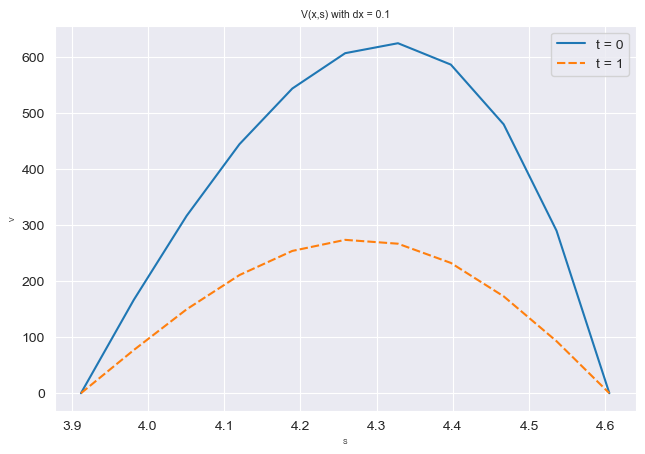

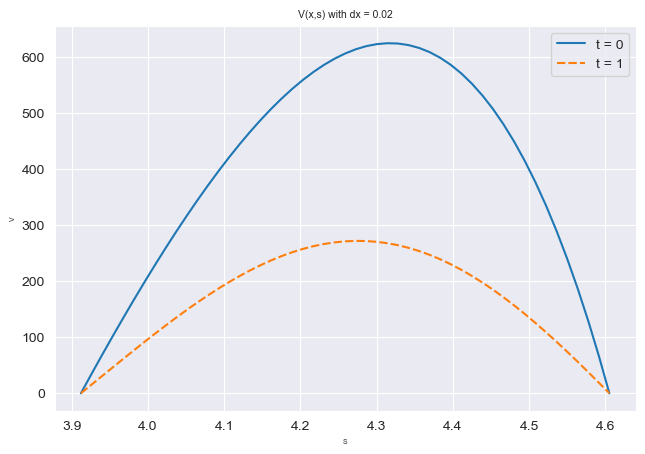

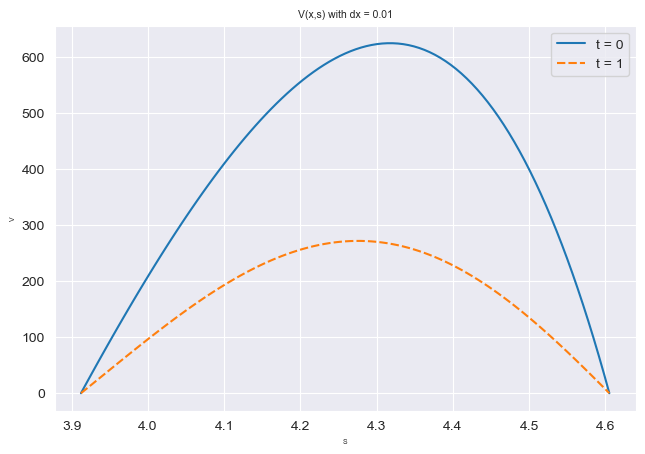

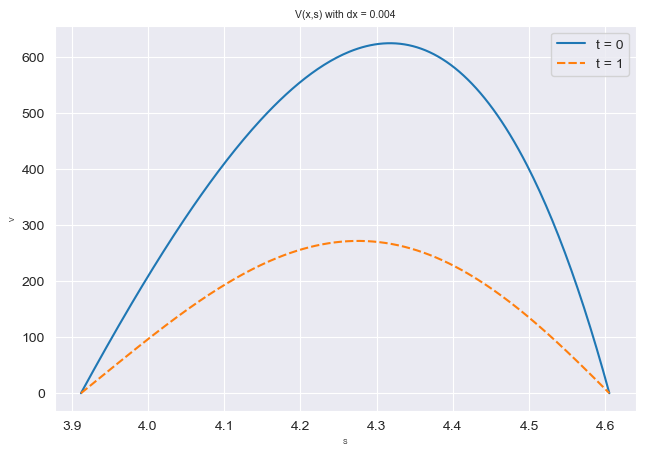

In [17]:

k = 0.5
dxs = [1/10, 1/50, 1/100, 1/250]
for dx in dxs:
    ds = k*(dx**2)
    w, t, x = solver(ds, dx)
    V_df = pd.DataFrame(index = x)
    for s in [0, 1]:
        V_df[f't = {s}'] = w[int(s/ds),]
    plt.figure(figsize=(7.5,5))
    ax = sns.lineplot(V_df)
    ax.set_title(f'V(x,s) with dx = {dx}',fontsize = 7.5)
    ax.set_xlabel('S',fontsize = '5')
    ax.set_ylabel('V',fontsize = '5')
    plt.show()

### k = 2

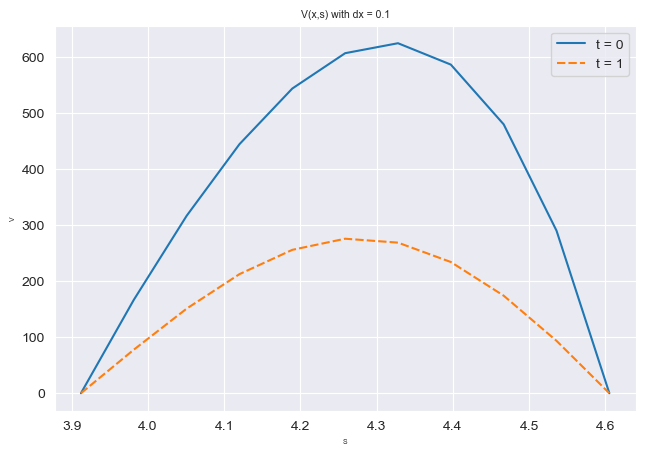

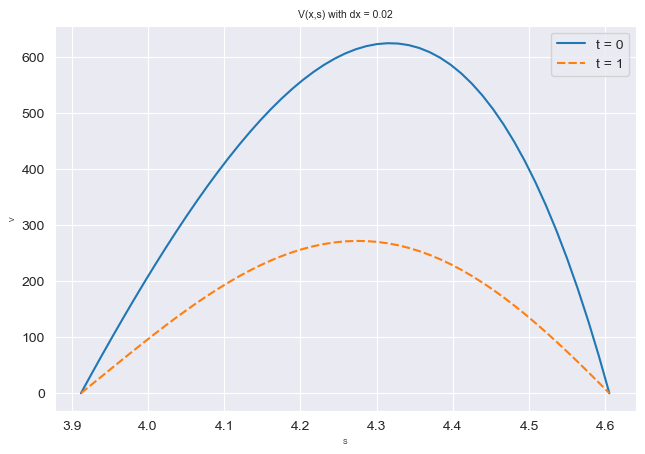

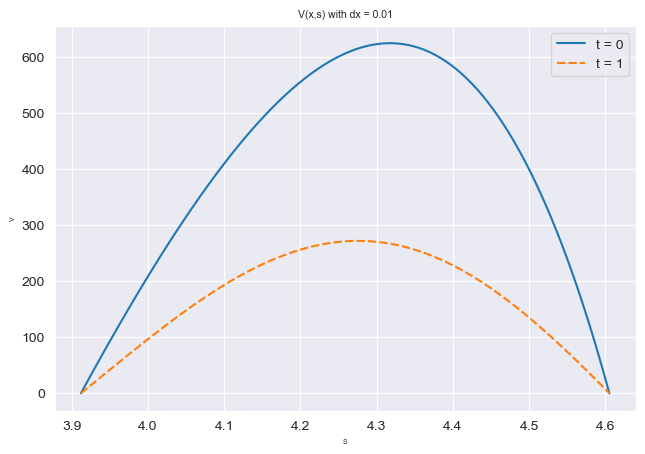

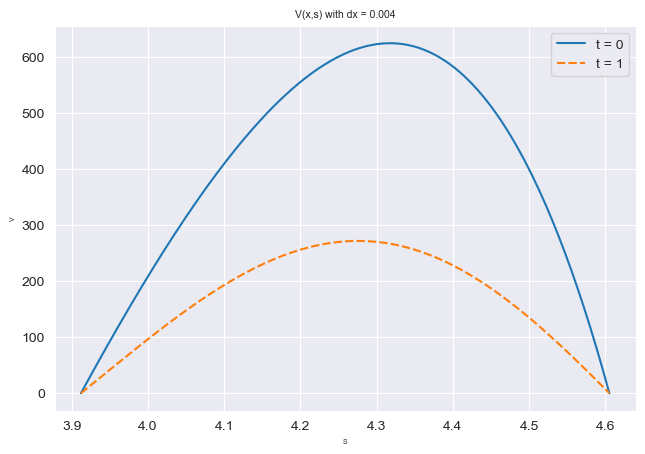

In [19]:
k = 2
dxs = [1/10, 1/50, 1/100, 1/250]
for dx in dxs:
    ds = k*(dx**2)
    w, t, x = solver(ds, dx)
    V_df = pd.DataFrame(index = x)
    for s in [0, 1]:
        V_df[f't = {s}'] = w[int(s/ds),]
    plt.figure(figsize=(7.5,5))
    ax = sns.lineplot(V_df)
    ax.set_title(f'V(x,s) with dx = {dx}',fontsize = 7.5)
    ax.set_xlabel('S',fontsize = '5')
    ax.set_ylabel('V',fontsize = '5')
    plt.show()

### k = 6

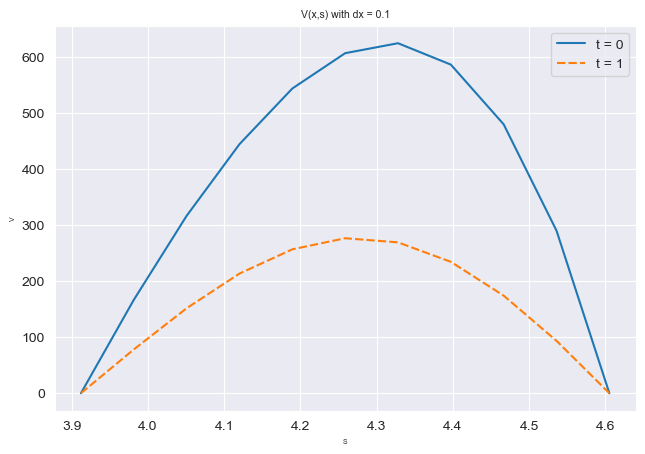

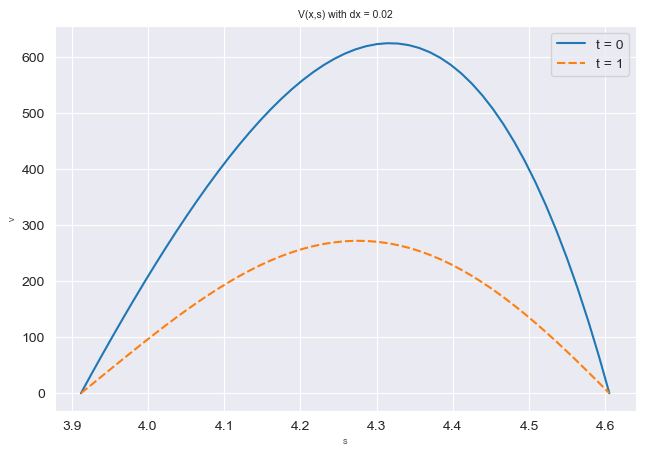

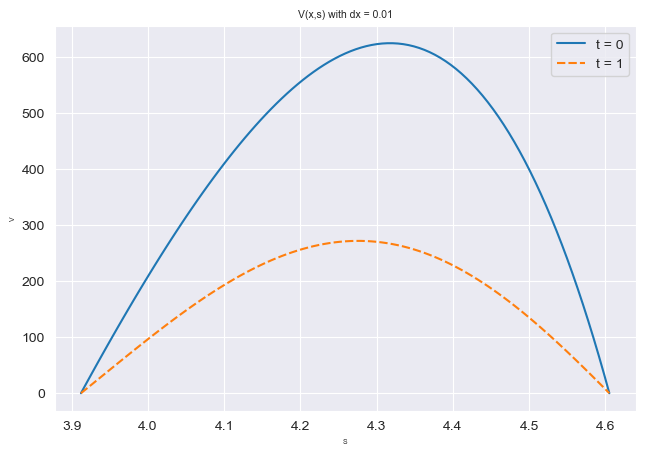

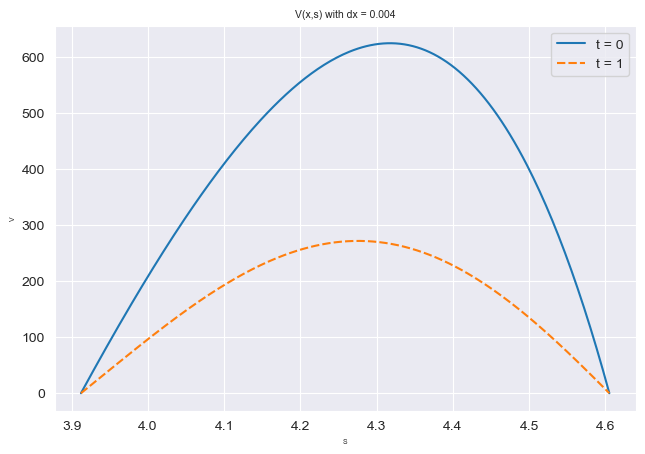

In [21]:
k = 6
dxs = [1/10, 1/50, 1/100, 1/250]
for dx in dxs:
    ds = k*(dx**2)
    w, t, x = solver(ds, dx)
    V_df = pd.DataFrame(index = x)
    for s in [0, 1]:
        V_df[f't = {s}'] = w[int(s/ds),]
    plt.figure(figsize=(7.5,5))
    ax = sns.lineplot(V_df)
    ax.set_title(f'V(x,s) with dx = {dx}',fontsize = 7.5)
    ax.set_xlabel('S',fontsize = '5')
    ax.set_ylabel('V',fontsize = '5')
    plt.show()

### k = 7

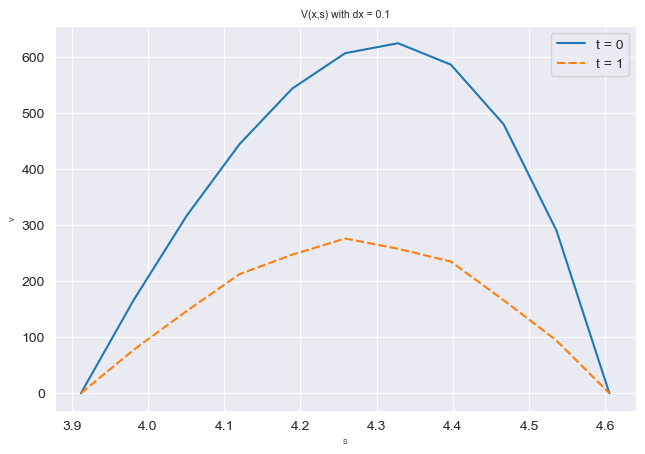

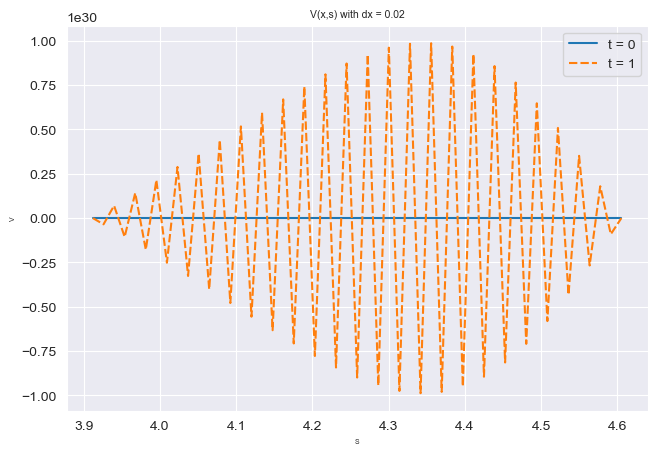

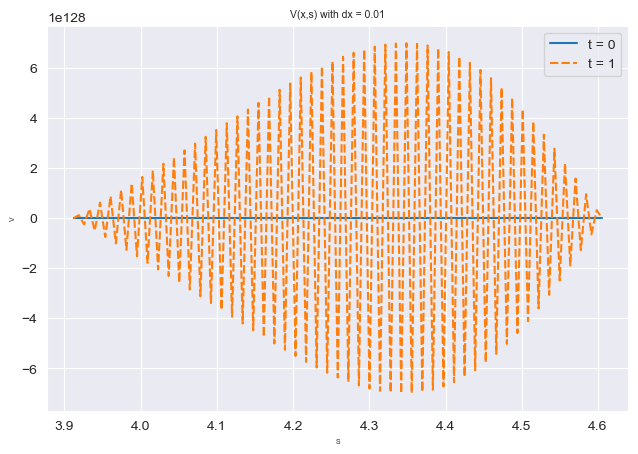

/var/folders/0t/9frdxs_x6xx6_qtzmnr8p5c40000gn/T/ipykernel_60316/3972285300.py:5: RuntimeWarning: overflow encountered in scalar multiply
  w_t = lambda w_plus, w, w_minus, dx, k: (k/2)*(w_plus*A(dx) + w*B(dx,k) + w_minus*C(dx)) + w
/var/folders/0t/9frdxs_x6xx6_qtzmnr8p5c40000gn/T/ipykernel_60316/3972285300.py:5: RuntimeWarning: invalid value encountered in scalar add
  w_t = lambda w_plus, w, w_minus, dx, k: (k/2)*(w_plus*A(dx) + w*B(dx,k) + w_minus*C(dx)) + w


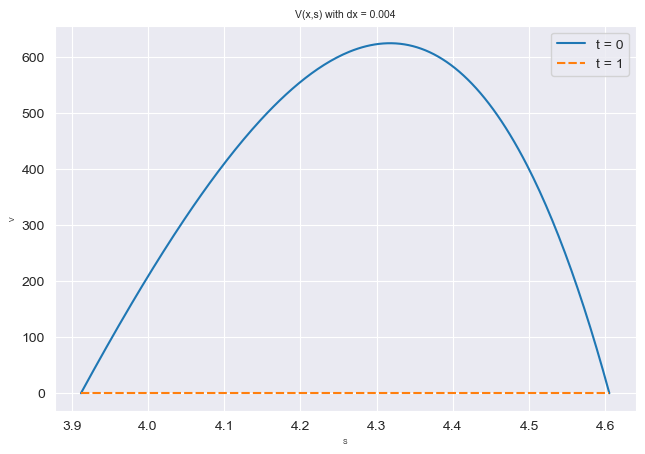

In [23]:
k = 7
dxs = [1/10, 1/50, 1/100, 1/250]
for dx in dxs:
    ds = k*(dx**2)
    w, t, x = solver(ds, dx)
    V_df = pd.DataFrame(index = x)
    for s in [0, 1]:
        V_df[f't = {s}'] = w[int(s/ds),]
    plt.figure(figsize=(7.5,5))
    ax = sns.lineplot(V_df)
    ax.set_title(f'V(x,s) with dx = {dx}',fontsize = 7.5)
    ax.set_xlabel('S',fontsize = '5')
    ax.set_ylabel('V',fontsize = '5')
    plt.show()

### k = 10

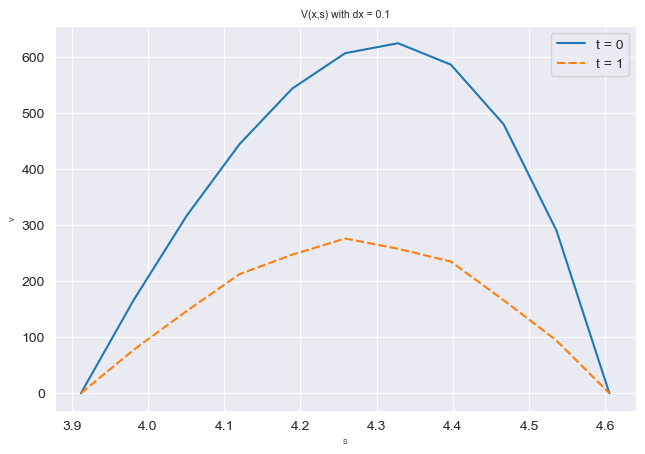

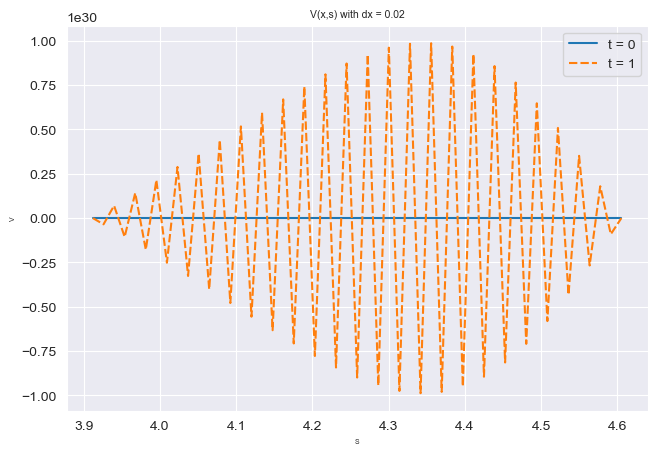

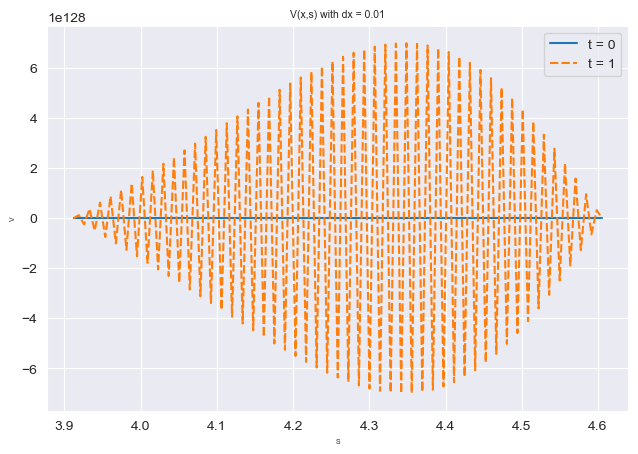

/var/folders/0t/9frdxs_x6xx6_qtzmnr8p5c40000gn/T/ipykernel_60316/3972285300.py:5: RuntimeWarning: overflow encountered in scalar multiply
  w_t = lambda w_plus, w, w_minus, dx, k: (k/2)*(w_plus*A(dx) + w*B(dx,k) + w_minus*C(dx)) + w
/var/folders/0t/9frdxs_x6xx6_qtzmnr8p5c40000gn/T/ipykernel_60316/3972285300.py:5: RuntimeWarning: invalid value encountered in scalar add
  w_t = lambda w_plus, w, w_minus, dx, k: (k/2)*(w_plus*A(dx) + w*B(dx,k) + w_minus*C(dx)) + w


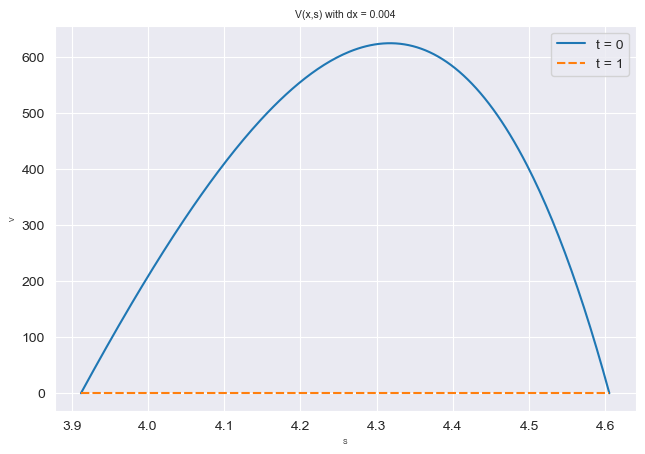

In [25]:
k = 7
dxs = [1/10, 1/50, 1/100, 1/250]
for dx in dxs:
    ds = k*(dx**2)
    w, t, x = solver(ds, dx)
    V_df = pd.DataFrame(index = x)
    for s in [0, 1]:
        V_df[f't = {s}'] = w[int(s/ds),]
    plt.figure(figsize=(7.5,5))
    ax = sns.lineplot(V_df)
    ax.set_title(f'V(x,s) with dx = {dx}',fontsize = 7.5)
    ax.set_xlabel('S',fontsize = '5')
    ax.set_ylabel('V',fontsize = '5')
    plt.show()

From the above, we can see that $k$ does not depend on $\Delta x$ in  terms of the stability of the method. It just contributes to the resolution of our plots and thus, the number of solutions we computed - As expected, as $\Delta x \to 0$ the greater the computational cost and time it requeries for the algorithim to run